In [3]:
import json
from src.common.audioviz_dataset import AudiovizDataset
from src.features.build_features import parse_feature_extractor, get_features
rms = {"name": "rms", "args": {}}
Spectral_Centroid = {"name": "Spectral_Centroid", "args": {}}
Spectral_Crest = {"name": "Spectral_Crest", "args": {}}
Spectral_Flux = {"name": "Spectral_Flux", "args": {}}
Spectral_Roll = {"name": "Spectral_Roll", "args": {}}
Zerocrossing_Rate = {"name": "Zerocrossing_Rate", "args": {}}

features = [rms,
Spectral_Centroid,
Spectral_Crest,
Spectral_Flux,
Spectral_Roll,
Zerocrossing_Rate]
extractors = [parse_feature_extractor(json.dumps(f)) for f in features]
dataset = AudiovizDataset.load("medley_solos_db")
feature_collection = get_features(dataset, features)

2020-12-28 17:29:27,585 - root - INFO - Successfully Decoded function call rms().
2020-12-28 17:29:27,587 - root - INFO - Successfully Decoded function call Spectral_Centroid().
2020-12-28 17:29:27,587 - root - INFO - Successfully Decoded function call Spectral_Crest().
2020-12-28 17:29:27,587 - root - INFO - Successfully Decoded function call Spectral_Flux().
2020-12-28 17:29:27,588 - root - INFO - Successfully Decoded function call Spectral_Roll().
2020-12-28 17:29:27,589 - root - INFO - Successfully Decoded function call Zerocrossing_Rate().
2020-12-28 17:29:27,591 - root - INFO - Successfully Decoded function call rms().
2020-12-28 17:29:27,591 - root - INFO - Successfully Decoded function call Spectral_Centroid().
2020-12-28 17:29:27,592 - root - INFO - Successfully Decoded function call Spectral_Crest().
2020-12-28 17:29:27,592 - root - INFO - Successfully Decoded function call Spectral_Flux().
2020-12-28 17:29:27,593 - root - INFO - Successfully Decoded function call Spectral_Ro

## Let's pick a sample and visualize each feature

rms() shape: (1, 253)
Spectral_Centroid() shape: (1, 257)
Spectral_Crest() shape: (1, 257)
Spectral_Flux() shape: (1, 257)
Spectral_Roll() shape: (1, 129)
Zerocrossing_Rate() shape: (1, 129)


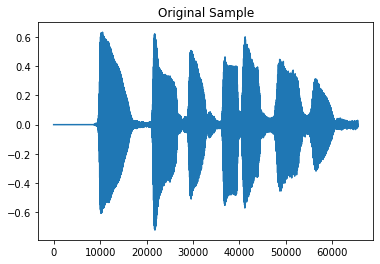

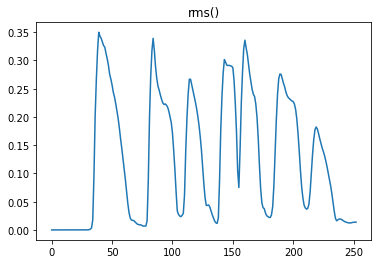

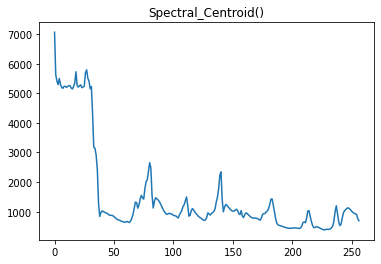

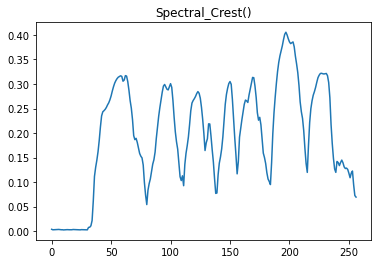

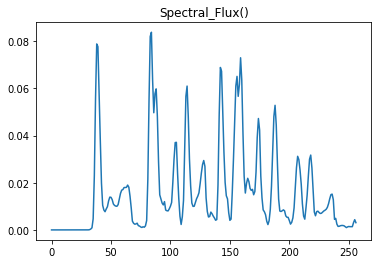

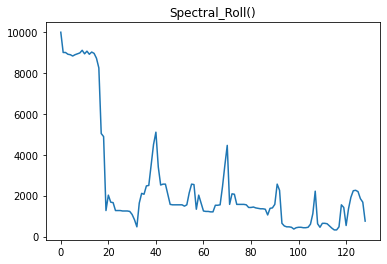

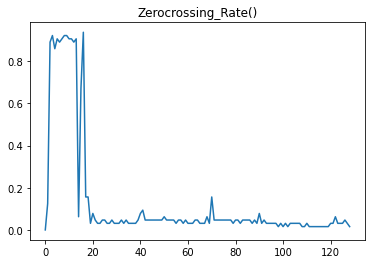

In [9]:
from matplotlib import pyplot as plt

i=0
import librosa.display
with feature_collection._store, dataset._store:
    plt.figure()
    plt.plot(dataset.data[i])
    plt.title("Original Sample")

    for fe in extractors:
        feature = feature_collection[fe]
        plt.figure()
        plt.plot(feature[i].T)  # have to transpose to correctly show data
        plt.title(str(fe))
        print(f"{str(fe)} shape: {feature[i].shape}")